<a href="https://colab.research.google.com/github/SumeyaHussein/DatabaseProject/blob/main/SotifyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sumeyahussein","key":"cd9b98b4e1e773fd9e60d955bf542510"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle/

In [ ]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#list all datset in kaggle
! kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                 146KB  2023-10-05 06:45:37          22181        460  1.0              
samyakb/student-stress-factors                              Student stress factors                            887B  2023-11-02 12:42:11           2558         57  0.9411765        
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics Dataset (2023)           139KB  2023-09-29 13:39:28          12222        295  1.0              
joebeachcapital/30000-spotify-songs                         30000 Spotify Songs                

In [ ]:
!kaggle datasets download -d nelgiriyewithana/top-spotify-songs-2023

  0% 0.00/47.1k [00:00<?, ?B/s]
100% 47.1k/47.1k [00:00<00:00, 77.6MB/s]


In [ ]:
!unzip top-spotify-songs-2023.zip

Archive:  top-spotify-songs-2023.zip
  inflating: spotify-2023.csv        


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)

import warnings

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("spotify-2023.csv", encoding="latin-1")

In [ ]:
categorical_columns = ['track_name', 'artist(s)_name', 'key', 'mode']
for col in df.columns:
    if col not in categorical_columns and col not in ['streams']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   874 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      896 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

In [ ]:
# Convert categorical columns to numerical
categorical_columns = ['track_name', 'artist(s)_name', 'key', 'mode']
for col in df.columns:
    if col not in categorical_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   9

In [ ]:
df['key'] = pd.Categorical(df['key']).codes
df['mode'] = pd.Categorical(df['mode']).codes

# Histogram: Streams Distribution
fig_streams_dist = px.histogram(df, x='streams', nbins=50, marginal='box', title='Streams Distribution')
fig_streams_dist.update_layout(xaxis_title='Streams', yaxis_title='Count')
fig_streams_dist.show()

In [27]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')

# Sort the DataFrame based on the "track_name" column
df_sorted = df.sort_values(by='in_spotify_charts')

# Print the values from the "in_spotify_charts" column in the sorted order
print(df_sorted[['track_name','in_spotify_charts']])

                                            track_name  in_spotify_charts
476  It's Beginning to Look a Lot Like Christmas (w...                  0
305                                              HAPPY                  0
304                                    SORRY NOT SORRY                  0
567                                        TO THE MOON                  0
302                                           DOGTOOTH                  0
..                                                 ...                ...
22                                    I Wanna Be Yours                110
2                                              vampire                113
12                                             Flowers                115
14                                           As It Was                130
0                  Seven (feat. Latto) (Explicit Ver.)                147

[953 rows x 2 columns]


In [29]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')

df_sorted = df.sort_values(by='released_year')

print(df_sorted[['artist(s)_name','released_year']])

                                        artist(s)_name  released_year
439                            Styrx, utku INC, Thezth           1930
469  Bing Crosby, John Scott Trotter & His Orchestr...           1942
460                                      Nat King Cole           1946
466                  Frank Sinatra, B. Swanson Quartet           1950
459                                          Burl Ives           1952
..                                                 ...            ...
225                                            ENHYPEN           2023
223                         Lana Del Rey, Taylor Swift           2023
220                                 BLESSD, Peso Pluma           2023
236                           Kendrick Lamar, Beyoncï¿           2023
0                                     Latto, Jung Kook           2023

[953 rows x 2 columns]


In [31]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')

df_sorted = df.sort_values(by='released_year')
print(df_sorted[['streams','released_year','track_name']])

       streams  released_year  \
439   90598517           1930   
469  395591396           1942   
460  389771964           1946   
466  473248298           1950   
459  395591396           1952   
..         ...            ...   
225   76767396           2023   
223   60350538           2023   
220  127026613           2023   
236   57089066           2023   
0    141381703           2023   

                                            track_name  
439                                    Agudo Mï¿½ï¿½gi  
469                                    White Christmas  
460  The Christmas Song (Merry Christmas To You) - ...  
466             Let It Snow! Let It Snow! Let It Snow!  
459           A Holly Jolly Christmas - Single Version  
..                                                 ...  
225                                            Bite Me  
223        Snow On The Beach (feat. More Lana Del Rey)  
220                                         Las Morras  
236       AMERICA HAS A PROBLEM (

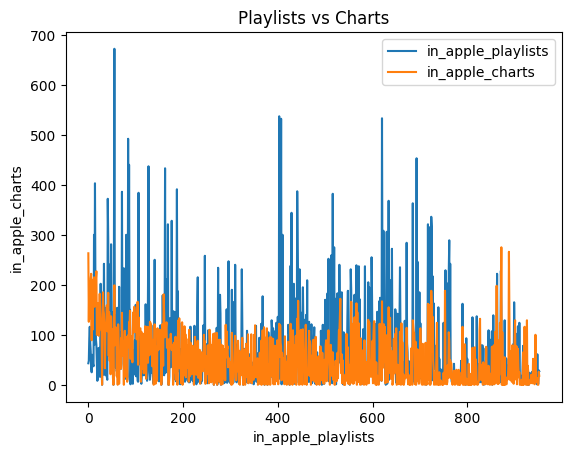

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame using a different encoding
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')

playlist_values = df['in_apple_playlists']
charts_values = df['in_apple_charts']

# Plotting the line chart
plt.plot(playlist_values, label='in_apple_playlists')
plt.plot(charts_values, label='in_apple_charts')

plt.xlabel('in_apple_playlists')
plt.ylabel('in_apple_charts')
plt.title('Playlists vs Charts')

# Adding a legend
plt.legend()

# Display the chart
plt.show()
